In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
plt.rcParams['font.size'] = 12.0
plt.rcParams['legend.fontsize'] = 10.0
plt.rcParams['figure.dpi']= 96
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.subplot.right'] = 0.8
plt.rcParams['figure.subplot.top'] = 0.95
plt.rcParams['figure.subplot.left'] = 0.08
plt.rcParams['lines.linewidth'] = 3.0

In [3]:
eta_SB=np.loadtxt('pompe_eta.csv',delimiter=',')
head_SB=np.loadtxt('pompe_head.csv',delimiter=',')

In [4]:
eta = eta_SB.copy()
head = head_SB.copy()

In [5]:
head[:,0] = head[:,0]*6.309e-5*60.
eta[:,0] = eta[:,0]*6.309e-5*60.
head[:,1] = head[:,1]*0.3048+1

In [6]:
head = head[head[:,0].argsort(),:]
eta = eta[eta[:,0].argsort(),:]

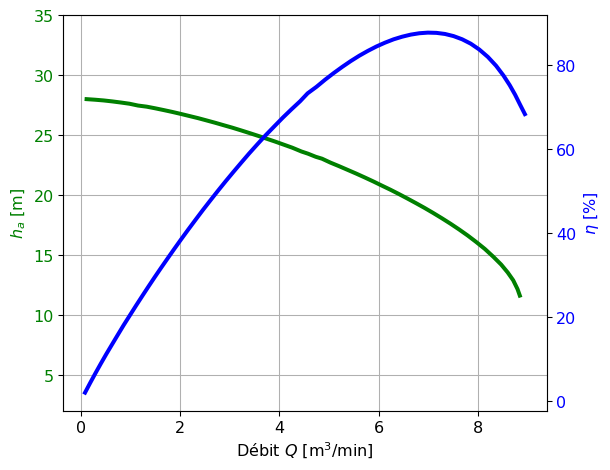

In [7]:
fig = plt.figure()
ax1 = fig.gca()
ax2 = ax1.twinx()
ax1.plot(head[:,0],head[:,1],color='green')
ax2.plot(eta[:,0],eta[:,1],color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel(r'$\eta$ [%]',color='blue')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylabel(r'$h_a$ [m]',color='green')
ax1.set_xlabel(r'Débit $Q$ [m$^3$/min]')
ax1.set_ylim(2.,35.)
ax1.grid()
plt.savefig('pompe_exercice_performance.png')
plt.show()

In [8]:
Ksyst = (0.02*60/0.15+0.5+1.5+1.0)*8/(9.8*pi**2*0.15**4)
print('Ksyst [SI] =',Ksyst)

Ksyst [SI] = 1797.1809847368556


In [9]:
h_syst = 3 + Ksyst * (head[:,0]/60.)**2

In [10]:
order_h = 2
pp = np.polyfit(head[:,0]/60,head[:,1],order_h)
pp[1]=0
def pompe_head(q):
    h_a = np.zeros_like(q)
    for n in range(order_h+1):
        h_a += pp[n] * q**(order_h-n)
    return h_a
print(pp)

[-645.2482661     0.           27.71765428]


In [11]:
order_e = 2
pp2 = np.polyfit(eta[:,0]/60.,eta[:,1],order_e)
def pompe_eta(q):
    eta_p = np.zeros_like(q)
    for n in range(order_e+1):
        eta_p += pp2[n] * q**(order_e-n)
    return eta_p

In [12]:
def h_diff(q):
    h_a = pompe_head(q)
    h_syst = 3 + Ksyst * q**2
    return h_a-h_syst
from scipy.optimize import fsolve
q_inter = fsolve(h_diff,0.5)[0]
print('intersection: [m3/min]',q_inter*60.)
print('charge: [m]',pompe_head(q_inter))
print('efficacite: [%]',pompe_eta(q_inter))

intersection: [m3/min] 6.035925641128673
charge: [m] 21.187670426226113
efficacite: [%] 82.45909724393817


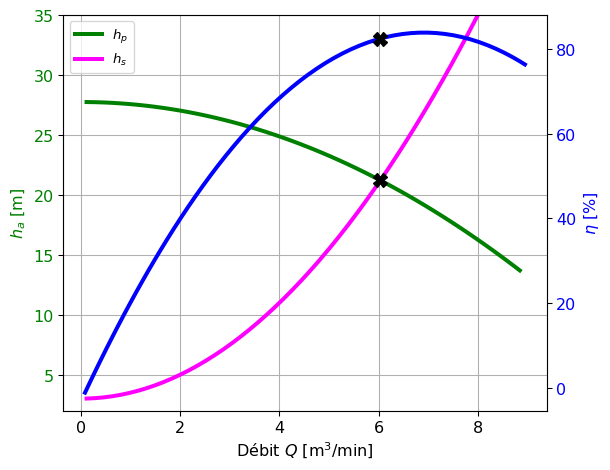

In [13]:
fig = plt.figure()
ax1 = fig.gca()
ax2 = ax1.twinx()
ax1.plot(head[:,0],pompe_head(head[:,0]/60),color='green',label=r'$h_p$')
ax1.plot(head[:,0],h_syst,color='magenta',label=r'$h_s$')
#ax1.plot(head[:,0],pompe_head(head[:,0]/60.),color='orange',linestyle='--')
ax1.plot(q_inter*60.,pompe_head(q_inter),marker='X',ms=10,color='black')
ax2.plot(eta[:,0],pompe_eta(eta[:,0]/60),color='blue')
#ax2.plot(eta[:,0],pompe_eta(eta[:,0]/60.),color='orange',linestyle='--')
ax2.plot(q_inter*60.,pompe_eta(q_inter),marker='X',ms=10,color='black')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel(r'$\eta$ [%]',color='blue')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylabel(r'$h_a$ [m]',color='green')
ax1.set_xlabel(r'Débit $Q$ [m$^3$/min]')
ax1.set_ylim(2.,35.)
ax1.grid()
ax1.legend(loc=2)
plt.savefig('pompe_solution_performance.png')
plt.show()